In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
đầu tiên.


In [7]:
df = pd.read_csv("titanic_disaster.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name

In [9]:
df[['secondName', 'firstName']] = df['Name'].str.split(',', expand=True)
df.drop(columns=['Name'], inplace=True)

df[['firstName', 'secondName']].head()


,firstName,secondName
0,Mr. Owen Harris,Braund
1,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,Miss. Laina,Heikkinen
3,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,Mr. William Henry,Allen


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [29]:
df['Sex'] = df['Sex'].replace({
    'male': 'M',
    'female': 'F'
})

df['Sex'].value_counts()


Sex
M    577
F    314
Name: count, dtype: int64

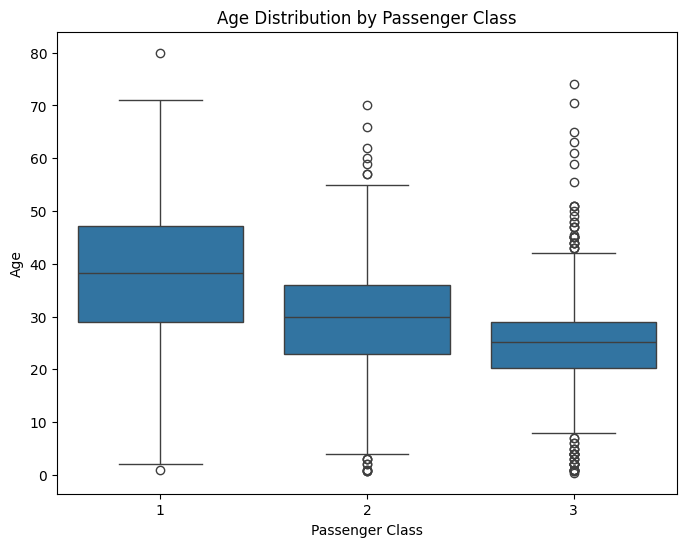

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

In [26]:
mean_age_by_class = df.groupby("Pclass")["Age"].mean()

df["Age"] = df.apply(
    lambda row: mean_age_by_class[row["Pclass"]] 
    if pd.isnull(row["Age"]) else row["Age"],
    axis=1
)

df["Age"].isnull().sum()

0

In [22]:
df[['Pclass', 'Age']].head(10)


,Pclass,Age
0,3,22.00000
1,1,38.00000
2,3,26.00000
3,1,35.00000
4,3,35.00000
5,3,25.14062
6,1,54.00000
7,3,2.00000
8,3,27.00000
9,2,14.00000


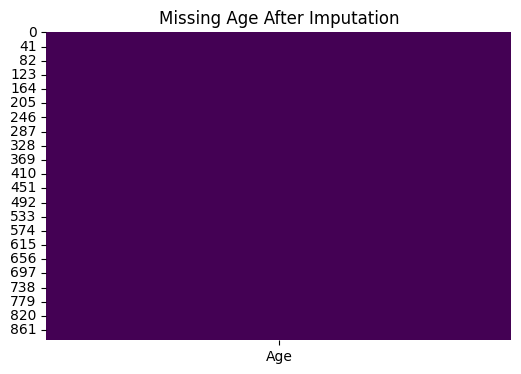

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Age"]].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Age After Imputation")
plt.show()


b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map

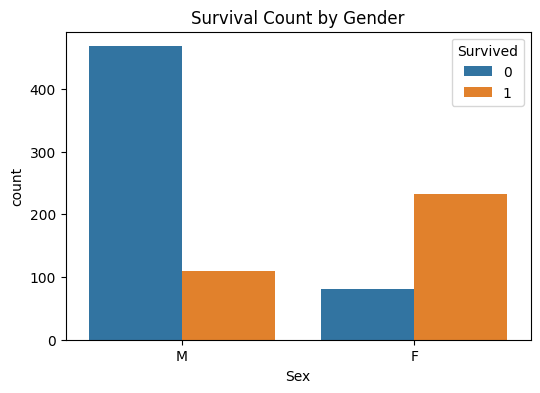

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Count by Gender")
plt.show()


6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [25]:
def age_group(age):
    if age <= 12:
        return "Kid"
    elif age <= 18:
        return "Teen"
    elif age <= 60:
        return "Adult"
    else:
        return "Older"

df['Agegroup'] = df['Age'].apply(age_group)

df[['Age', 'Agegroup']].head(10)


,Age,Agegroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,Older
6,54.0,Adult
7,2.0,Kid
8,27.0,Adult
9,14.0,Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [26]:
# Tạo cột namePrefix
df["namePrefix"] = df["secondName"].str.extract(r"(Mr|Mrs|Miss|Master)", expand=False)

df[["secondName", "namePrefix"]].head(10)




,secondName,namePrefix
0,Braund,NaN
1,Cumings,NaN
2,Heikkinen,NaN
3,Futrelle,NaN
4,Allen,NaN
5,Moran,NaN
6,McCarthy,NaN
7,Palsson,NaN
8,Johnson,NaN
9,Nasser,NaN


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [27]:

df["familySize"] = 1 + df["SibSp"] + df["Parch"]

df[["SibSp", "Parch", "familySize"]].head(10)


,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [28]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'familySize']].head()

,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
thì thay thế bằng “Unknown”

In [29]:
df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 1 else 0)

df[['familySize', 'Alone']].head(10)

,familySize,Alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1
5,1,1
6,1,1
7,5,0
8,3,0
9,2,0


In [30]:
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["typeCabin"] = df["Cabin"].str[0]

df[['Cabin', 'typeCabin']].head()


,Cabin,typeCabin
0,Unknown,U
1,C85,C
2,Unknown,U
3,C123,C
4,Unknown,U
